In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!ls ../input/dataset7402/ 

ls: ../input/dataset7402/: No such file or directory


In [6]:
data = pd.read_csv("./iris.csv")
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [7]:
data.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  150 non-null    float64
 2   Sepal.Width   150 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


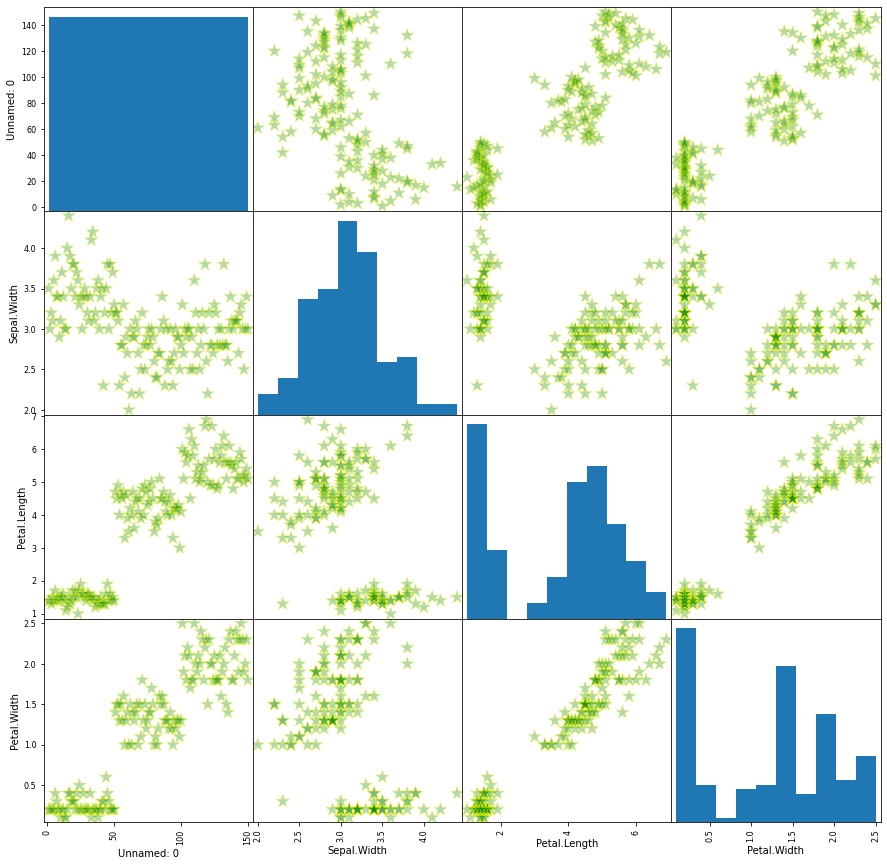

In [23]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'Sepal.Length']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Sepal.Length'],   
                                       c=color_list,               
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.3,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "yellow")
plt.show()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: Sepal.Length, dtype: int64

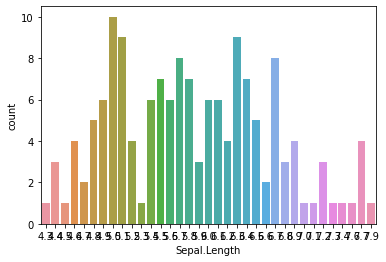

In [25]:
sns.countplot(x="Sepal.Length", data=data)
data.loc[:,'Sepal.Length'].value_counts()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'Sepal.Length'], data.loc[:,'Sepal.Length']
knn.fit(x,y)
prediction = knn.predict(x)
# format()：格式化输出
print('Prediction: {}'.format(prediction))

ValueError: could not convert string to float: 'setosa'

In [30]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
# 设置k值为3
knn = KNeighborsClassifier(n_neighbors = 3)
# 设置特征值和预测值
x,y = data.loc[:,data.columns != 'Sepal.Length'], data.loc[:,'Sepal.Length']
# 将模型拟合到训练集
data_n = knn.fit(x_train,y_train)
# 预测精准度
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) 

ValueError: could not convert string to float: 'virginica'

In [37]:
# 模型复杂度
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# 循环K值从1到25
for i, k in enumerate(neig):
    # k从1到25(不包括1、25)
    knn = KNeighborsClassifier(n_neighbors=k)
    # 使用KNN拟合
    knn.fit(x_train,y_train)
    # 训练集的准确度
    train_accuracy.append(knn.score(x_train, y_train))
    # 测试集的准确度
    test_accuracy.append(knn.score(x_test, y_test))

# 可视化
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

ValueError: could not convert string to float: 'virginica'